In [1]:
# Neccessary imports
import numpy as np
import scipy.io
import os
import mne
import matplotlib.pyplot as plt

In [2]:
dataset_folder = 'dataset' # Dataset folder relative to the jupyter notebook
mat_data = []

# Load all files from the dataset folder
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    mat_data.append(scipy.io.loadmat(file_path))



Creating RawArray with float64 data, n_channels=30, n_times=4000
    Range : 0 ... 3999 =      0.000 ...    15.996 secs
Ready.
Effective window size : 8.192 (s)


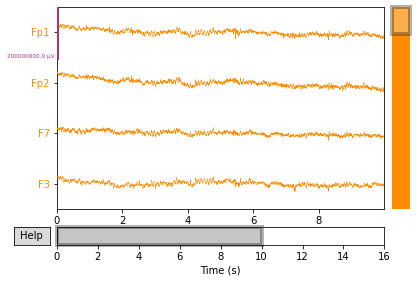

<ipython-input-3-8c6aeca33b06>:26: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


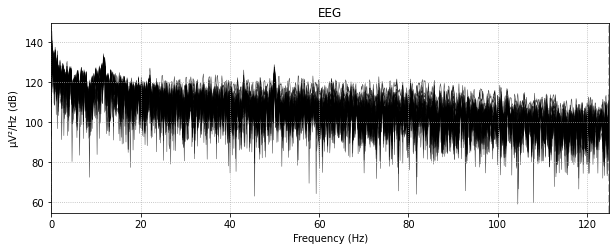

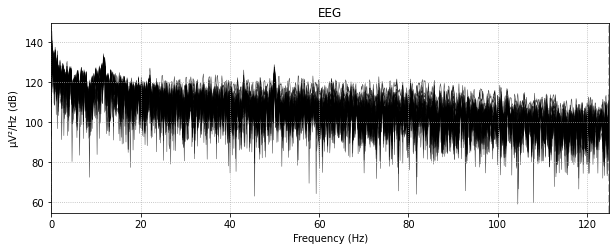

In [3]:
# Visualization of one sample with MNE
sample = mat_data[0]
bci_exp = sample['bciexp']
eeg_data = bci_exp['data']
eeg_data = eeg_data[0][0][:,:,0]
eeg_channels = bci_exp['label']
eeg_channels = eeg_channels[0][0]

channels = []
for channel in eeg_channels:
    channels.append(channel[0][0])

channel_types = ['eeg' for _ in channels]
sampling_rate = bci_exp['srate']

info = mne.create_info(ch_names=channels, sfreq=sampling_rate, ch_types=channel_types)
raw = mne.io.RawArray(eeg_data, info)
scalings = {'eeg': 100} # reasonable scaling

colors = {'eeg': 'DarkOrange'}
bg_color = 'b'

raw.plot(color=colors, bgcolor='DarkSlateBlue',
         n_channels=4, scalings=scalings, )

raw.plot_psd()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices